In [33]:
import pandas as pd
data = pd.read_csv(r"C:\Users\dell\OneDrive\Bureau\NIDS\data\cic.csv")
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [35]:
categorical = [col for col in data.columns if data[col].dtype == 'object']
print ("Categorical values:", categorical)
numerical = [col for col in data.columns if data[col].dtype != 'object']
print("Numerical values:", numerical)

Categorical values: ['Timestamp', 'Label']
Numerical values: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg

In [36]:
data['Label'].value_counts()

Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64

[]

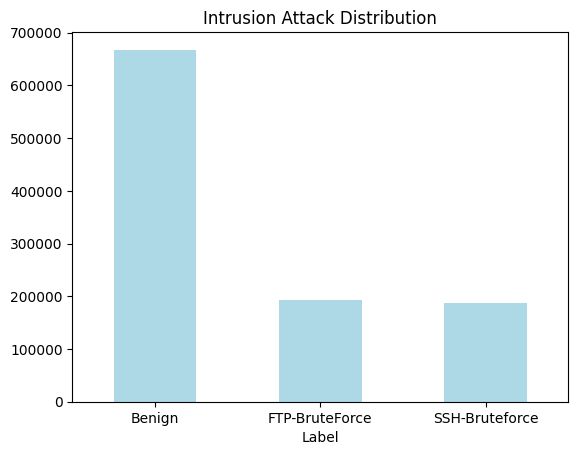

In [37]:
import matplotlib.pyplot as plt 
data.drop(data[data['Label']=='Label'].index,inplace=True) #Drop unnecesary Label
data['Label'].value_counts().plot(kind='bar', color='lightblue')
plt.title("Intrusion Attack Distribution")
plt.xticks(rotation = 0)
plt.plot()

In [38]:
data.drop(['Timestamp','Dst Port'],axis=1,inplace=True) #Irrelevant Features

In [39]:
data.dtypes

Protocol             int64
Flow Duration        int64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts      int64
                    ...   
Idle Mean          float64
Idle Std           float64
Idle Max             int64
Idle Min             int64
Label               object
Length: 78, dtype: object

In [40]:
var = data.drop("Label", axis=1).var()
for col in var.index:
  if var[col] == 0:
    print(f"{col} has only {data[col].nunique()} value: {data[col].unique()}")

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Bwd PSH Flags has only 1 value: [0]
Fwd URG Flags has only 1 value: [0]
Bwd URG Flags has only 1 value: [0]
CWE Flag Count has only 1 value: [0]
Fwd Byts/b Avg has only 1 value: [0]
Fwd Pkts/b Avg has only 1 value: [0]
Fwd Blk Rate Avg has only 1 value: [0]
Bwd Byts/b Avg has only 1 value: [0]
Bwd Pkts/b Avg has only 1 value: [0]
Bwd Blk Rate Avg has only 1 value: [0]


In [41]:
#Drop the columns wht one value (only zero)
columns=['Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','CWE Flag Count','Fwd Byts/b Avg','Fwd Pkts/b Avg' ,'Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg']
data.drop(columns=columns, axis=1, inplace=True)

In [ ]:
print("Number of Duplicated values: ", data.duplicated().sum())

Number of Duplicated values:  428770


In [43]:
data.shape

(1048575, 68)

In [44]:
data.drop_duplicates(keep="first", inplace=True)
data.shape

(619805, 68)

In [45]:
print(data.isna().sum()[data.isna().sum()>0])

Flow Byts/s    348
dtype: int64


In [46]:
import numpy as np
for col in data.drop("Label", axis=1).columns:
  if data[col].max()==np.inf:
    print(f"{col} {data[col].max()}")

Flow Byts/s inf
Flow Pkts/s inf


In [47]:
data.fillna({"Flow Byts/s":0}, inplace=True) # Fill NaN values with 0
data.replace([np.inf, -np.inf], 0, inplace=True) # Replace both positive and negative infinity values to 0 as it can led from 0 to 0 division

In [48]:
for col in data.drop("Label",axis=1).columns:
  m=data[col].min()
  if m<0:
    print(f"{col} {m}")

Flow Duration -919011000000
Flow Pkts/s -0.0010297608
Flow IAT Mean -340701000000.0
Flow IAT Max -159438000000
Flow IAT Min -943564000000
Fwd IAT Tot -919011000000
Fwd IAT Mean -340701000000.0
Fwd IAT Max -159438000000
Fwd IAT Min -943564000000
Init Fwd Win Byts -1
Init Bwd Win Byts -1


In [49]:
neg=['Init Fwd Win Byts','Init Bwd Win Byts']
for col in neg:
  negative_rows = data[data[col] < 0].index
  data=data.drop(negative_rows)

In [50]:
data.shape

(392941, 68)

In [51]:
data['Label'].value_counts()

Label
Benign            298844
SSH-Bruteforce     94043
FTP-BruteForce        54
Name: count, dtype: int64

In [52]:
#Convert attacks as 'Malicious'
data.replace(to_replace=["FTP-BruteForce", "SSH-Bruteforce"], value="Malicious", inplace=True)

In [53]:
data['Label'].value_counts()

Label
Benign       298844
Malicious     94097
Name: count, dtype: int64

In [54]:
data.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
3,6,6453966,15,10,1239,2273,744,0,82.600000,196.741237,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,8804066,14,11,1143,2209,744,0,81.642857,203.745545,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
5,6,6989341,16,12,1239,2273,744,0,77.437500,190.831154,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
8,6,476513,5,3,211,463,211,0,42.200000,94.362069,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
9,6,475048,5,3,220,472,220,0,44.000000,98.386991,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


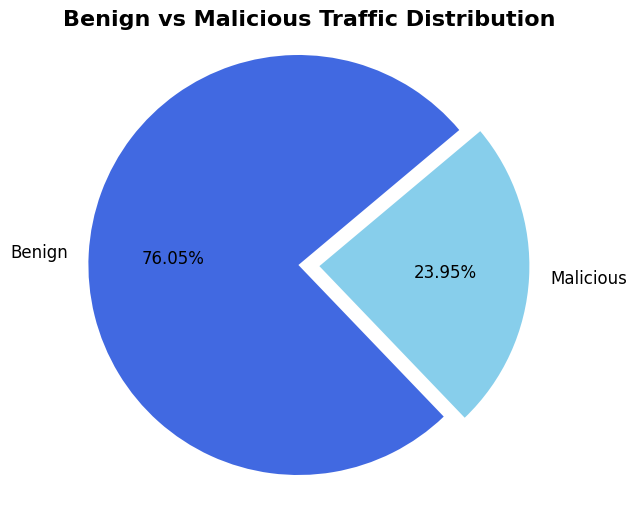

In [55]:
benign_count = data['Label'].value_counts().get('Benign')
malicious_count = data['Label'].value_counts().get('Malicious')

# Define labels and sizes
labels = ['Benign', 'Malicious']
sizes = [benign_count, malicious_count]

# Define colors
colors = ['RoyalBlue', 'skyBlue']  # Royalblue for Benign, Skyblue for Malicious
explode=(0.1,0)
# Create the pie chart
plt.figure(figsize=(7, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct='%2.2f%%', startangle=40,textprops={'fontsize': 12})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Benign vs Malicious Traffic Distribution', fontsize=16, fontweight='bold')
plt.show()
     

In [56]:
# Split the dataset into features and target
X = data.drop('Label', axis=1)
y = data['Label']

In [57]:
label_mapping = {'Benign': 0, 'Malicious': 1}
y = y.map(label_mapping)

In [58]:
y.value_counts()

Label
0    298844
1     94097
Name: count, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the feature data and transform it
X_train = pd.DataFrame(scaler.fit_transform(x_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(x_test), columns=X.columns)


Accuracy:  0.9982440290625915
Precision:  0.996076768105185
F1 score:  0.9963408813703134
Recall Score:  0.9966051347337153


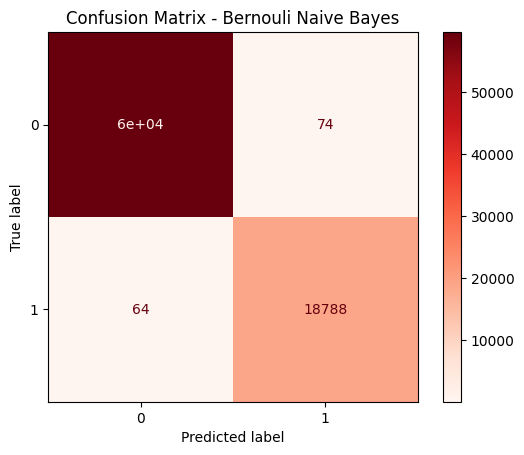

In [61]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay 
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_predictbnb = bnb.predict(X_test)
accuracybnb = accuracy_score(y_test,y_predictbnb)
print("Accuracy: ", accuracybnb)
precisionbnb = precision_score(y_test, y_predictbnb)
print("Precision: ",precisionbnb)
f1bnb = f1_score(y_test, y_predictbnb)
print("F1 score: ",f1bnb)
recallscorebnb= recall_score(y_test, y_predictbnb)
print("Recall Score: ",recallscorebnb)
cm_bnb = confusion_matrix(y_test, y_predictbnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bnb)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix - Bernouli Naive Bayes")
plt.show()

Accuracy:  0.9999872755729173
Precision:  1.0
F1 score:  0.9999734769116516
Recall Score:  0.9999469552302143


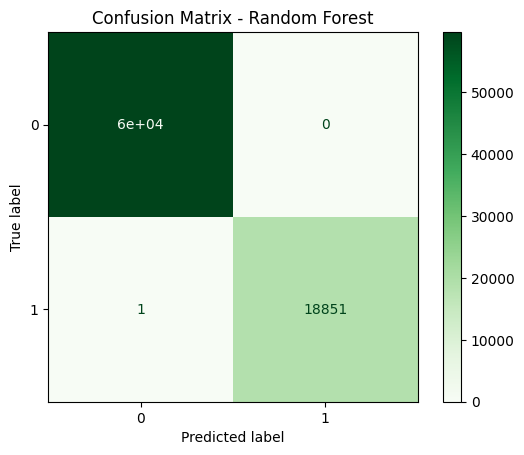

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=2)
rf.fit(X_train, y_train)
y_predictrf = rf.predict(X_test)
accuracyrf = accuracy_score(y_test,y_predictrf)
print("Accuracy: ", accuracyrf)
precisionrf = precision_score(y_test, y_predictrf)
print("Precision: ",precisionrf)
f1rf = f1_score(y_test, y_predictrf)
print("F1 score: ",f1rf)
recallscorerf= recall_score(y_test, y_predictrf)
print("Recall Score: ",recallscorerf)
cm_rf = confusion_matrix(y_test, y_predictrf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Accuracy:  0.999885480156256
Precision:  0.9997878096652697
F1 score:  0.9997612922048643
Recall Score:  0.9997347761510715


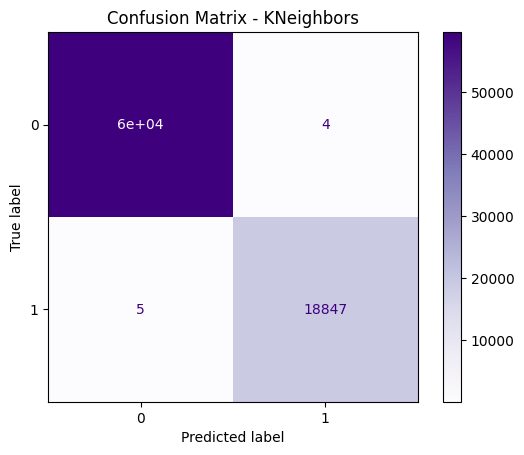

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
y_predictknn = knn.predict(X_test)
accuracyknn = accuracy_score(y_test,y_predictknn)
print("Accuracy: ", accuracyknn)
precisionknn = precision_score(y_test, y_predictknn)
print("Precision: ",precisionknn)
f1knn = f1_score(y_test, y_predictknn)
print("F1 score: ",f1knn)
recallscoreknn= recall_score(y_test, y_predictknn)
print("Recall Score: ",recallscoreknn)
cm_knn = confusion_matrix(y_test, y_predictknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - KNeighbors")
plt.show()

Accuracy:  0.999885480156256
Precision:  0.999840840362884
F1 score:  0.9997612795416567
Recall Score:  0.9996817313812858


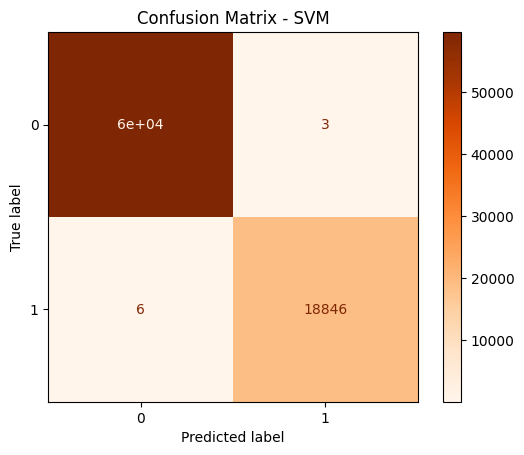

In [65]:
from sklearn import svm
cls = svm.SVC(kernel="linear")
cls.fit(X_train,y_train)
y_predictsvm = cls.predict(X_test)
accuracysvm = accuracy_score(y_test,y_predictsvm)
print("Accuracy: ", accuracysvm)
precisionsvm = precision_score(y_test, y_predictsvm)
print("Precision: ",precisionsvm)
f1svm = f1_score(y_test, y_predictsvm)
print("F1 score: ",f1svm)
recallscoresvm= recall_score(y_test, y_predictsvm)
print("Recall Score: ",recallscoresvm)
cm_svm = confusion_matrix(y_test, y_predictsvm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - SVM")
plt.show()

Accuracy:  0.999885480156256
Precision:  0.999840840362884
F1 score:  0.9997612795416567
Recall Score:  0.9996817313812858


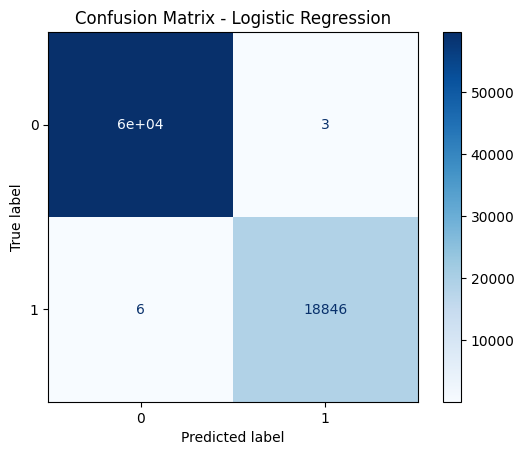

In [66]:
from sklearn.linear_model import LogisticRegression 
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_predictlr = lr.predict(X_test)
accuracylr = accuracy_score(y_test, y_predictlr)
print("Accuracy: ", accuracylr)
precisionlr = precision_score(y_test, y_predictlr)
print("Precision: ",precisionlr)
f1lr = f1_score(y_test, y_predictlr)
print("F1 score: ",f1lr)
recallscorelr= recall_score(y_test, y_predictlr)
print("Recall Score: ",recallscorelr)
cm_lr = confusion_matrix(y_test, y_predictlr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [67]:
from tabulate import tabulate
data = [["Logistic Regression", accuracylr, precisionlr, recallscorelr, f1lr],
        ["Naive Bayes Model", accuracybnb, precisionbnb, recallscorebnb, f1bnb],
        ["KNN", accuracyknn, precisionknn, recallscoreknn, f1knn],
        ["SVM", accuracysvm, precisionsvm, recallscoresvm, f1svm],
        ["Random Forest", accuracyrf, precisionrf, recallscorerf, f1rf],]

col_names = ["Model", "Accuracy", "Precision", "Recall", "F1"]
print( tabulate(data, headers=col_names, tablefmt="fancy_grid") )

╒═════════════════════╤════════════╤═════════════╤══════════╤══════════╕
│ Model               │   Accuracy │   Precision │   Recall │       F1 │
╞═════════════════════╪════════════╪═════════════╪══════════╪══════════╡
│ Logistic Regression │   0.999885 │    0.999841 │ 0.999682 │ 0.999761 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ Naive Bayes Model   │   0.998244 │    0.996077 │ 0.996605 │ 0.996341 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ KNN                 │   0.999885 │    0.999788 │ 0.999735 │ 0.999761 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ SVM                 │   0.999885 │    0.999841 │ 0.999682 │ 0.999761 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ Random Forest       │   0.999987 │    1        │ 0.999947 │ 0.999973 │
╘═════════════════════╧════════════╧═════════════╧══════════╧══════════╛
